In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob,os
%matplotlib inline
# prepare object points
nx = 9#TODO: enter the number of inside corners in x
ny = 5#TODO: enter the number of inside corners in y

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
print(images)

objpoints = []
imgpoints =[]

objp = np.zeros((9*5,3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:5].T.reshape(-1,2)

for frame in images:
    img = cv2.imread(frame)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        imgpoints.append(corners)
        objpoints.append(objp)
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        



['camera_cal/calibration1.jpg', 'camera_cal/calibration10.jpg', 'camera_cal/calibration11.jpg', 'camera_cal/calibration12.jpg', 'camera_cal/calibration13.jpg', 'camera_cal/calibration14.jpg', 'camera_cal/calibration15.jpg', 'camera_cal/calibration16.jpg', 'camera_cal/calibration17.jpg', 'camera_cal/calibration18.jpg', 'camera_cal/calibration19.jpg', 'camera_cal/calibration2.jpg', 'camera_cal/calibration20.jpg', 'camera_cal/calibration3.jpg', 'camera_cal/calibration4.jpg', 'camera_cal/calibration5.jpg', 'camera_cal/calibration6.jpg', 'camera_cal/calibration7.jpg', 'camera_cal/calibration8.jpg', 'camera_cal/calibration9.jpg']


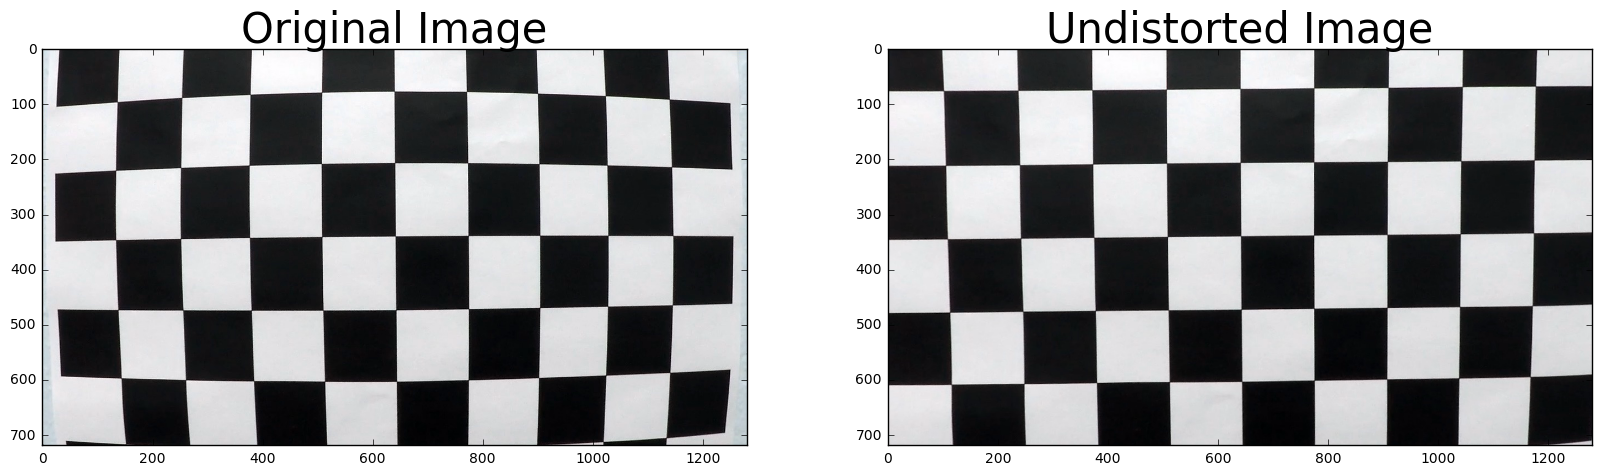

In [2]:
image = cv2.imread('camera_cal/calibration1.jpg')
img_size=(image.shape[1],image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(image, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [3]:
mtx = mtx
mtx

array([[  4.58577773e+03,   0.00000000e+00,   5.75017861e+02],
       [  0.00000000e+00,   4.64506857e+03,   2.88591078e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [4]:
dist = dist
dist

array([[ -4.36704121e+00,   9.95932047e+00,   9.22104545e-02,
          4.51441551e-02,   1.01267607e+03]])

In [5]:
import pickle
mtx

a=np.array([[  7.52615043e+03,   0.00000000e+00,   4.69192259e+02],
       [  0.00000000e+00,   7.86343209e+03,   2.73078310e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

print(a)

[[  7.52615043e+03   0.00000000e+00   4.69192259e+02]
 [  0.00000000e+00   7.86343209e+03   2.73078310e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


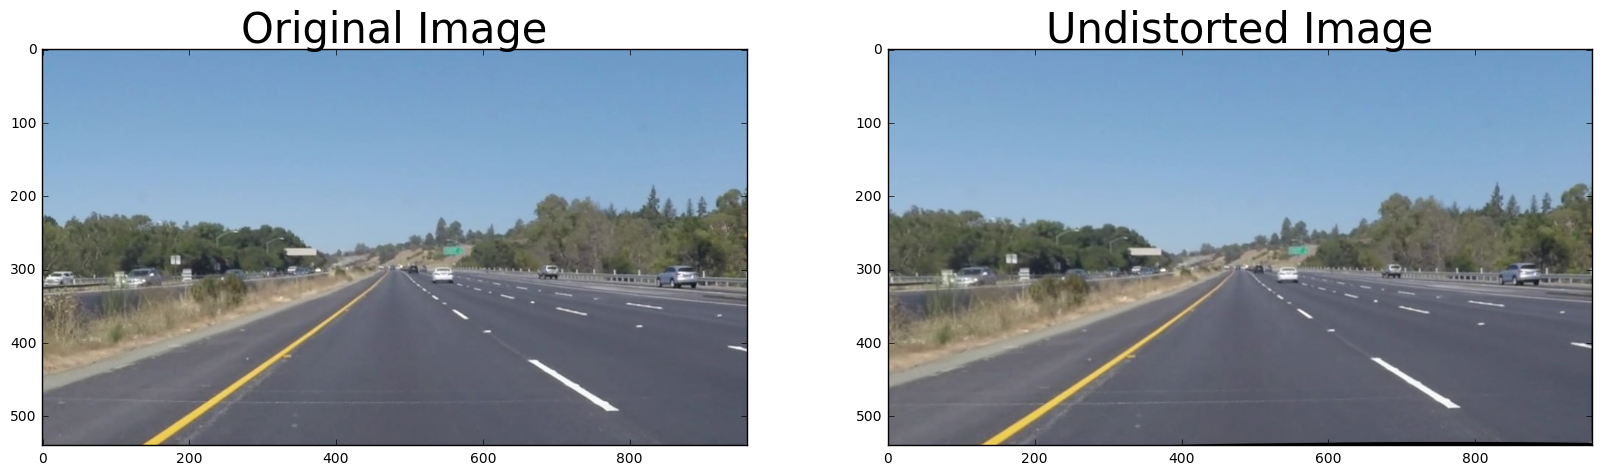

In [6]:
image =cv2.imread("test_images/solidYellowLeft.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_size=(image.shape[1],image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(image, mtx, dist, None, mtx)
dst_bgr = cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
cv2.imwrite("output_images/solidYellowLeft_undist.jpg",dst_bgr)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

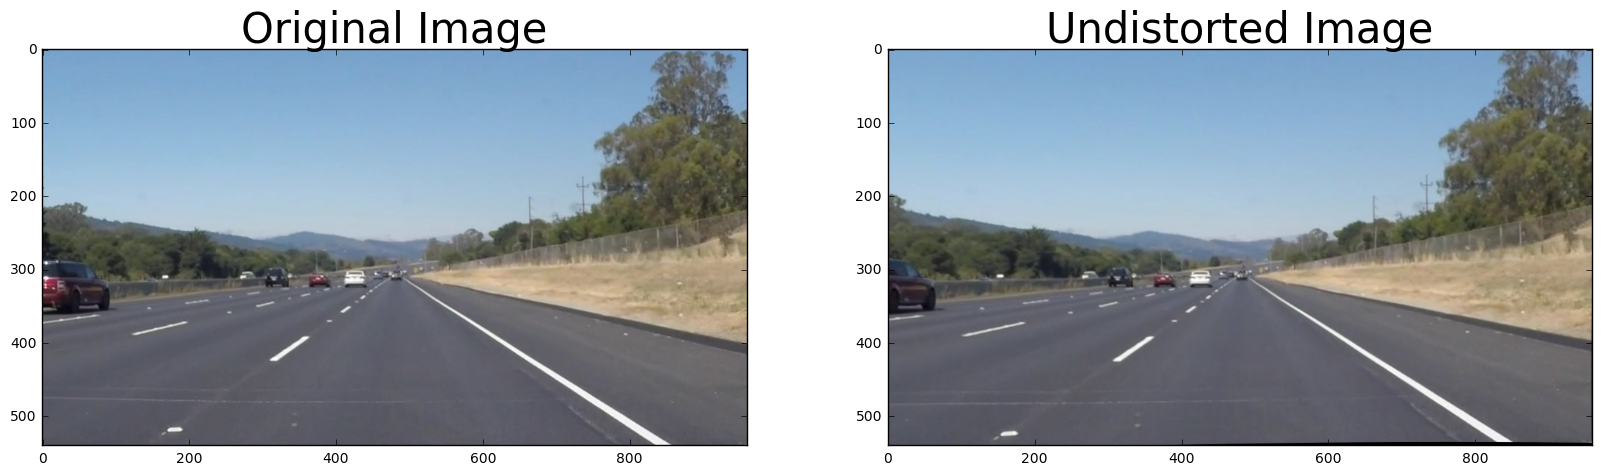

In [7]:
image =cv2.imread("test_images/solidWhiteRight.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img_size=(image.shape[1],image.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(image, mtx, dist, None, mtx)
dst_bgr = cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
cv2.imwrite("output_images/solidWhiteRight_undist.jpg",dst_bgr)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [8]:
def undist_img_test(img_title,objpoints,imgpoints):
    img = cv2.imread(img_title)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_size=(img.shape[1],img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    dst_bgr =cv2.cvtColor(dst,cv2.COLOR_RGB2BGR)
    cv2.imwrite("output_images/test"+str(i+1)+"_undist.jpg",dst_bgr)
    
images = glob.glob('test_images/test*.jpg')
for i,img_title in enumerate(images):    
    undist_img_test(img_title,objpoints,imgpoints)